# New Trend Visuals
Generate MA and moving standard deviation plots for the variables within the data fixed for sampling inconsistencies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})

plt.rcParams.update({'font.size': 18,
                    'xtick.labelsize': 12,
                    'ytick.labelsize': 12,
                    'lines.linewidth': 2,
                    'axes.labelsize': 12})

In [2]:
def norm_to_day(df):
    """
    Normalize the index of a DF to the days based 
    on sampling frequency
    
    Keyword arguments:
    df -- DF with a 'Day' column to fit its index to
    """
    return (df.index) / 48 + (min(np.unique(df[df['Y'] == 0]['Day'])))

def plot(table):
    """
    MA and standard deviation plots for all subjects and
    variables
    
    Keyword arguments:
    table -- CSV from which to read info
    """
    df = pd.read_csv(table).drop(columns=[
        'Unnamed: 0', 'Time'])
    
    subjs = np.unique(df['SubjectName'])
    
    # Reorder columns
    order = ['Day',
             'TimeS',
             'Study',
             'SubjectName',
             'Temp_Mean', 
             'RespMean_Mean', 
             'HR_Mean', 
             'RR_Mean', 
             'AOPAMean_Mean',
             'Y']
    
    df_new = pd.DataFrame([
        df[column] for column in order if column in df.columns]).T
    
    # Get 'Mean' columns only
    cols = df_new.columns[4:]
    _, idx = np.unique([
        col.split('_')[0] for col in cols], return_index=True)
    cols = cols[np.sort(idx)][:-1]

    # Plot the column trends
    for col in cols:
        fig = plt.figure(figsize=(26, 8))
        plt.subplot(1, 2, 1)
        for subj in subjs:
            subj_df = df_new[
                df_new['SubjectName'] == subj].reset_index()
            plt.plot(
                norm_to_day(subj_df), subj_df[
                    col].rolling(48).mean(), label=subj)
        plt.xlabel('Day')
        
        '''
        Change the range of the x-ticks so that exposure starts at
        Day 0, frequency of 1
        '''
        plt.xticks(np.arange(
            plt.xlim()[0] + 1, plt.xlim()[1] - 1))
        plt.xticks(np.floor(
            plt.xticks()[0]))
        plt.ylabel(col)
        plt.title(
            col + ' 1-Day Moving Average \nfor All Subjects in ' + df_new[
                'Study'][0])
        plt.legend()
        
        plt.subplot(1, 2, 2)
        for subj in subjs:
            subj_df = df_new[
                df_new['SubjectName'] == subj].reset_index()
            plt.plot(
                norm_to_day(subj_df), subj_df[col].rolling(48).std(), label=subj)
        plt.xlabel('Day')
        plt.xticks(np.arange(
            plt.xlim()[0] + 1, plt.xlim()[1] - 1))
        plt.xticks(np.floor(
            plt.xticks()[0]))
        plt.ylabel(col)
        plt.title(col + ' 1-Day Moving Standard Deviation \nfor All Subjects in ' + df_new['Study'][0])
        plt.legend()

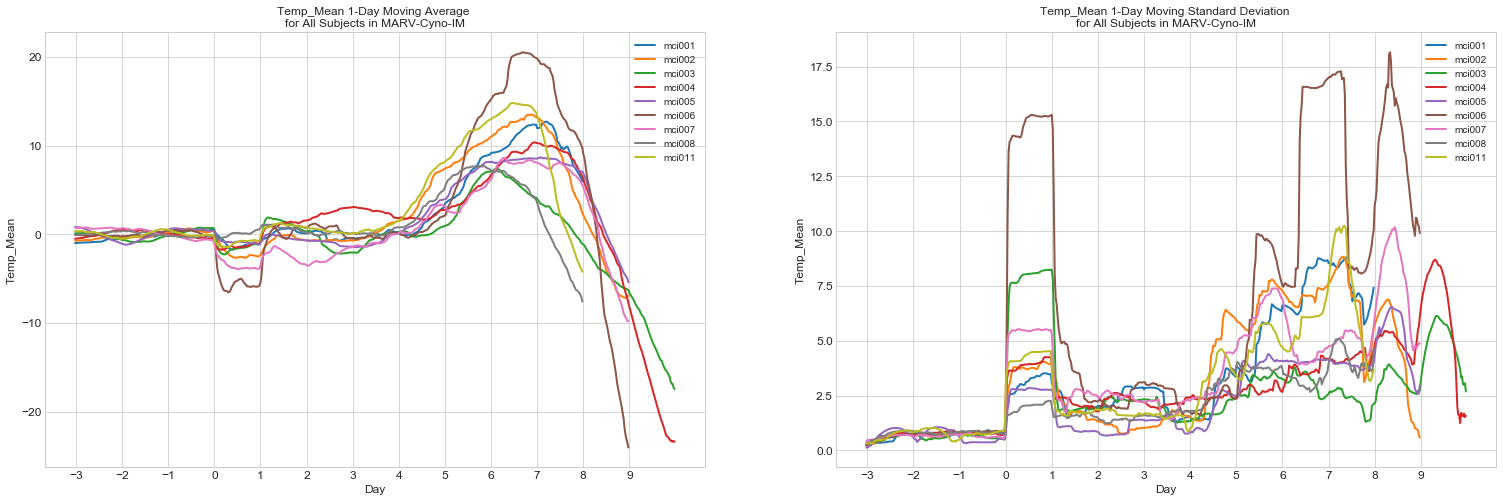

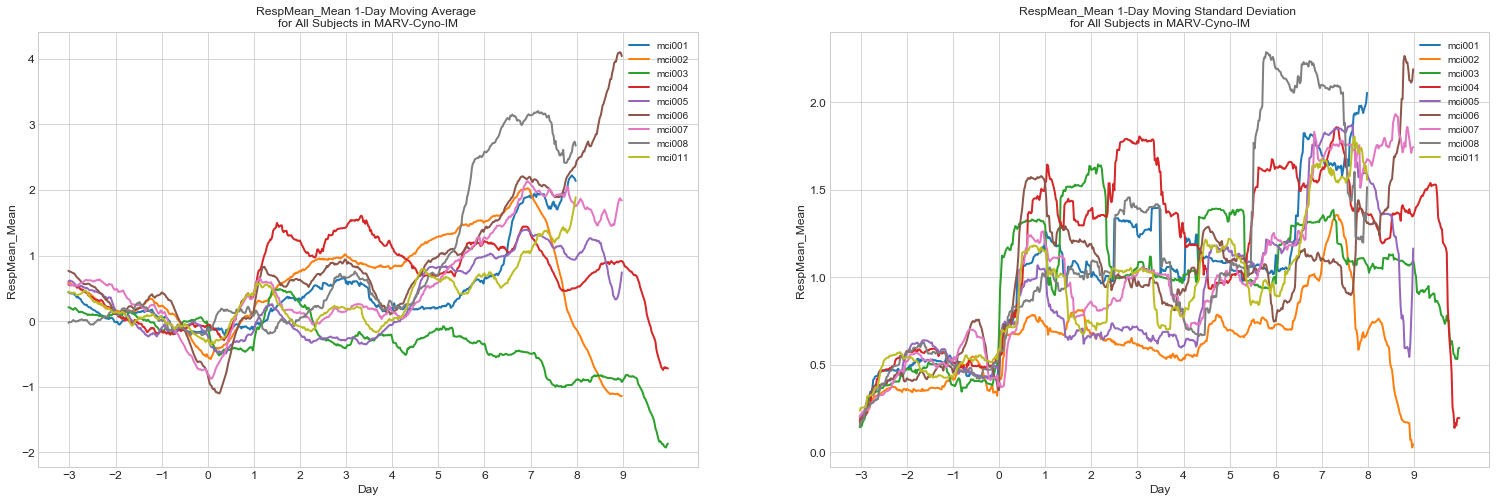

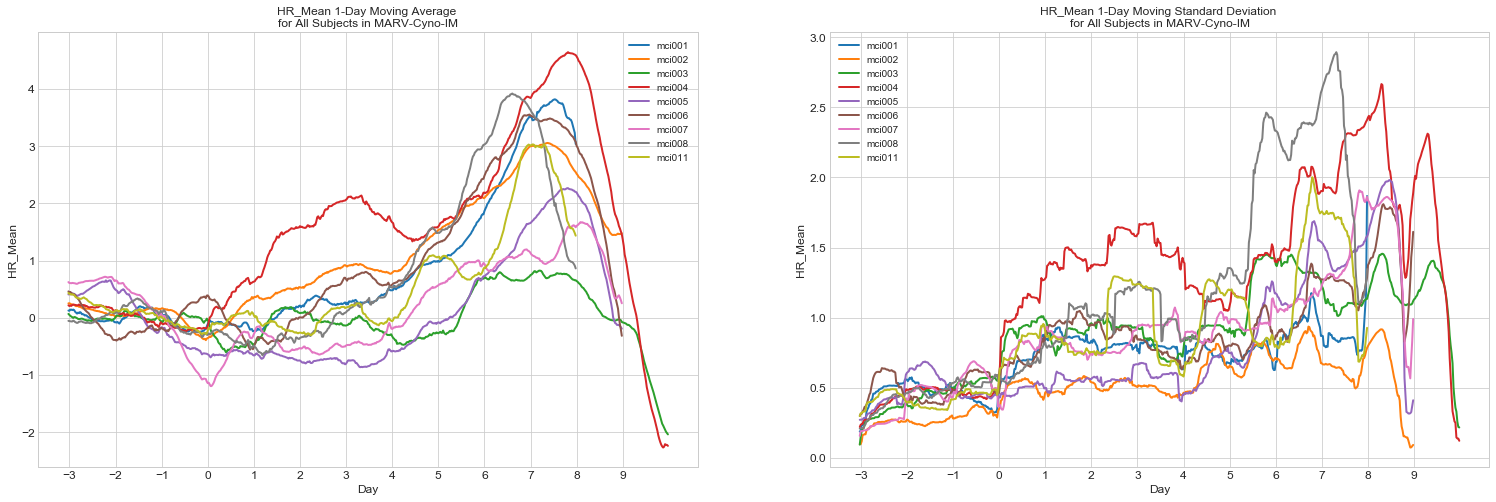

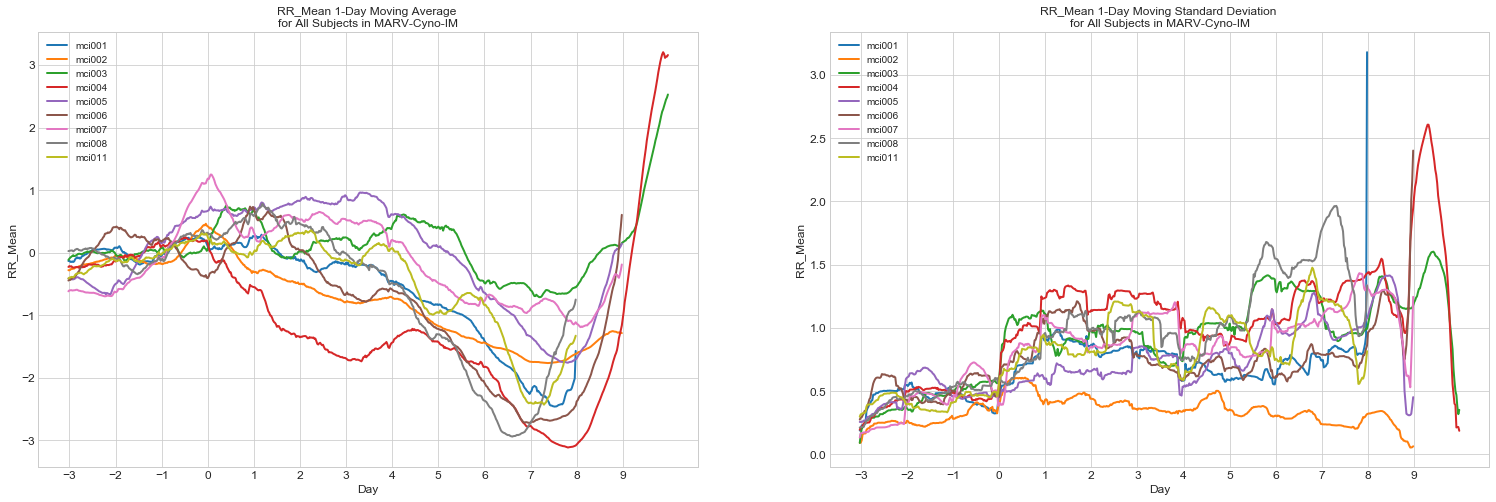

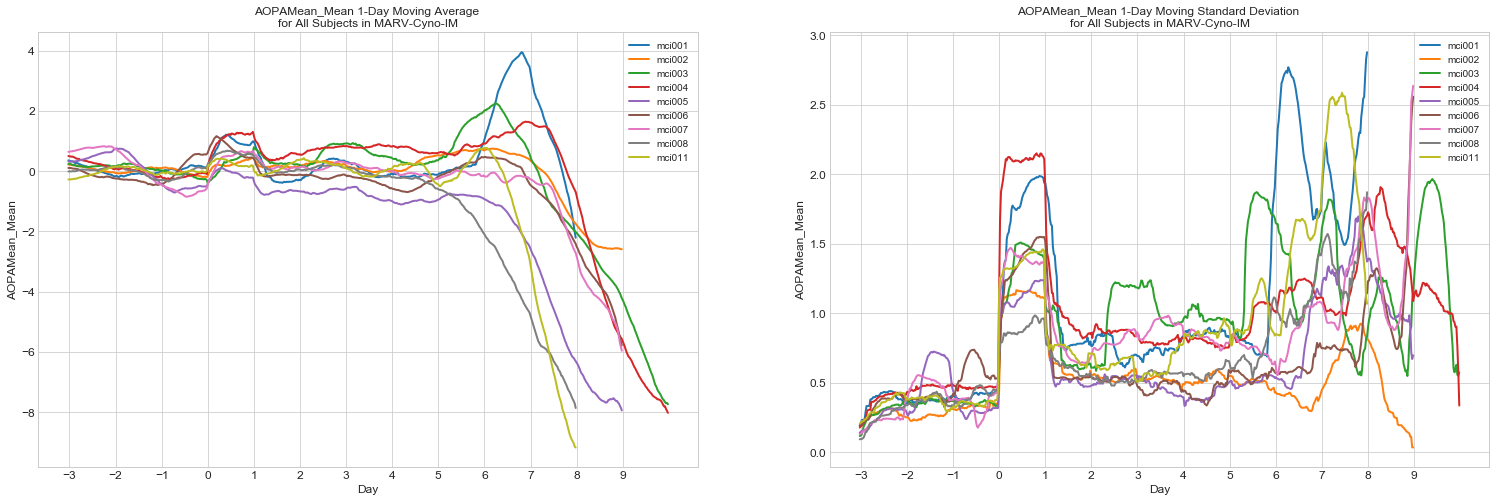

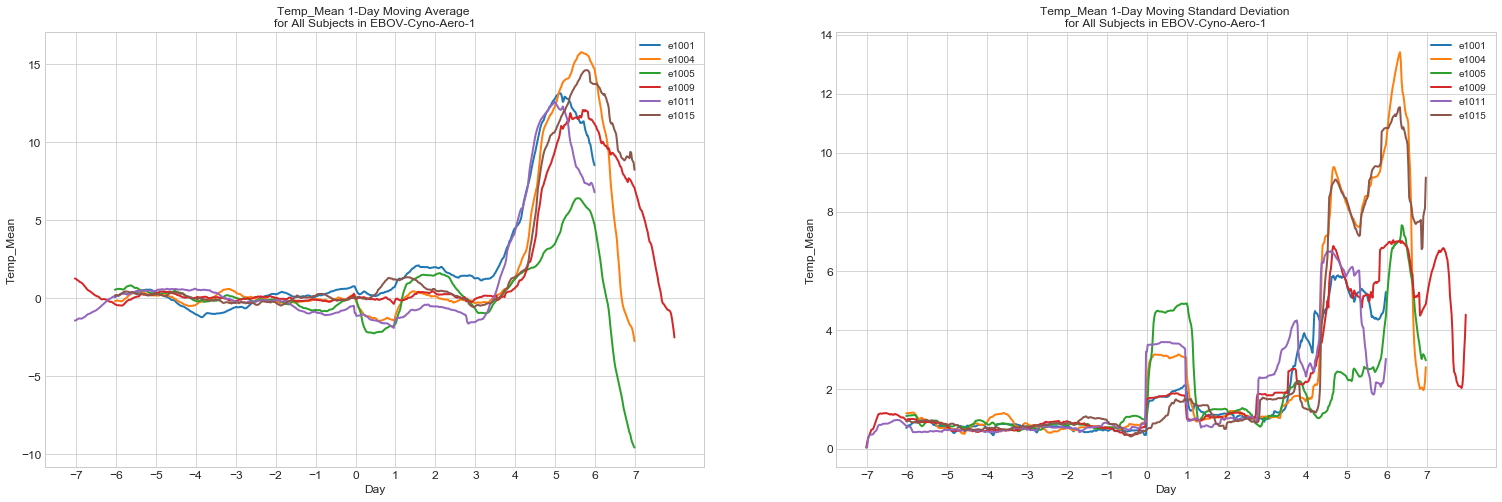

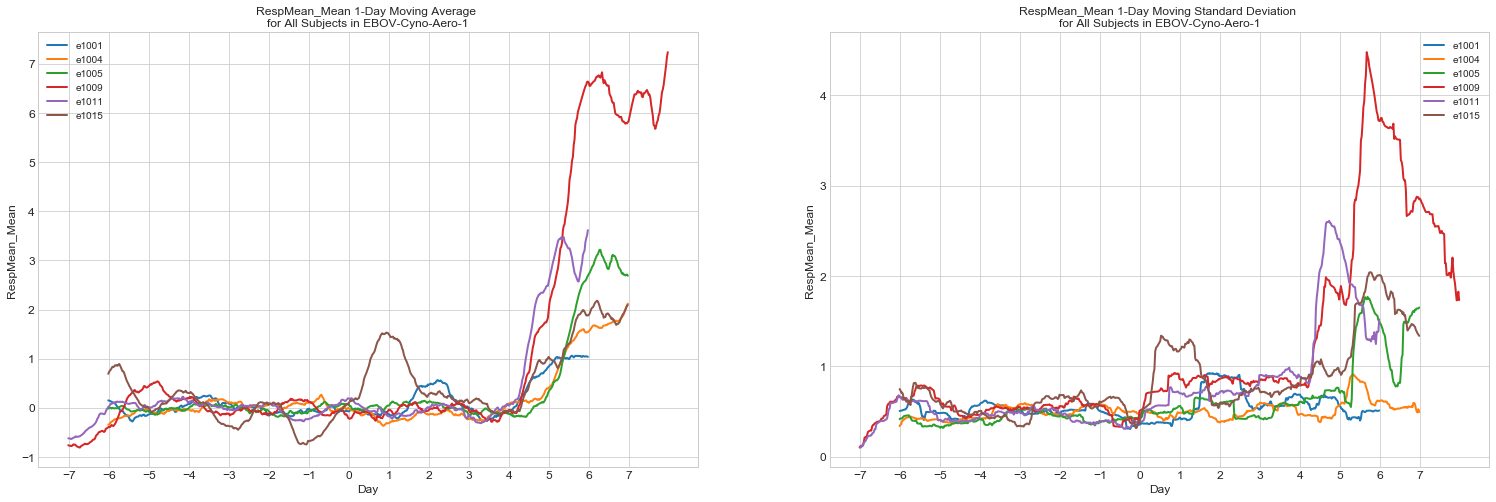

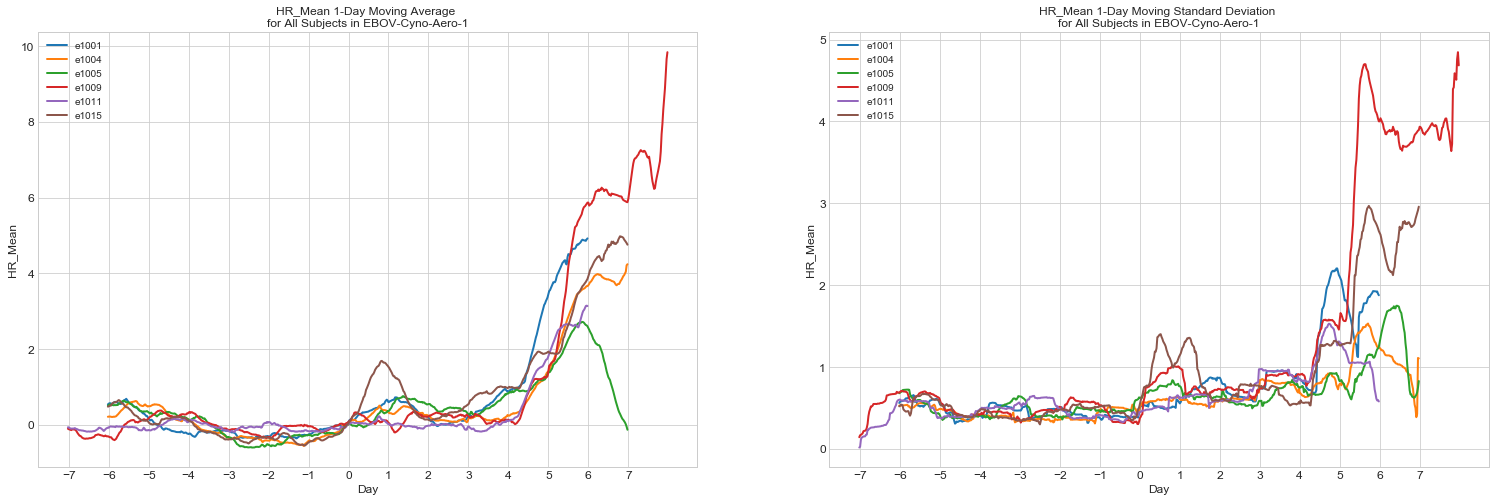

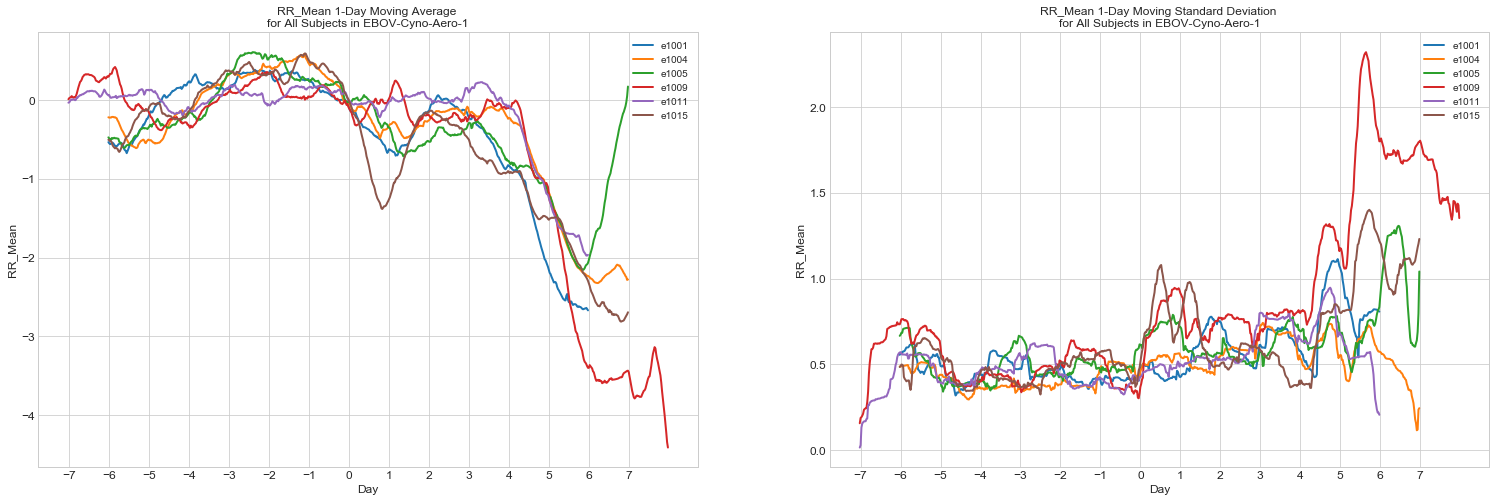

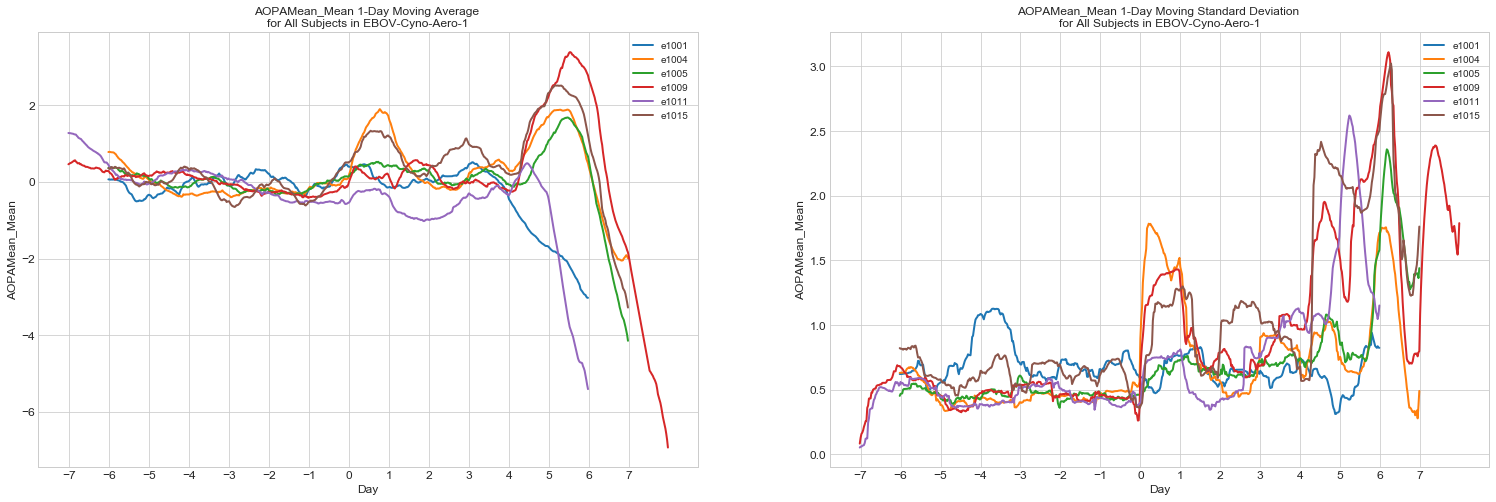

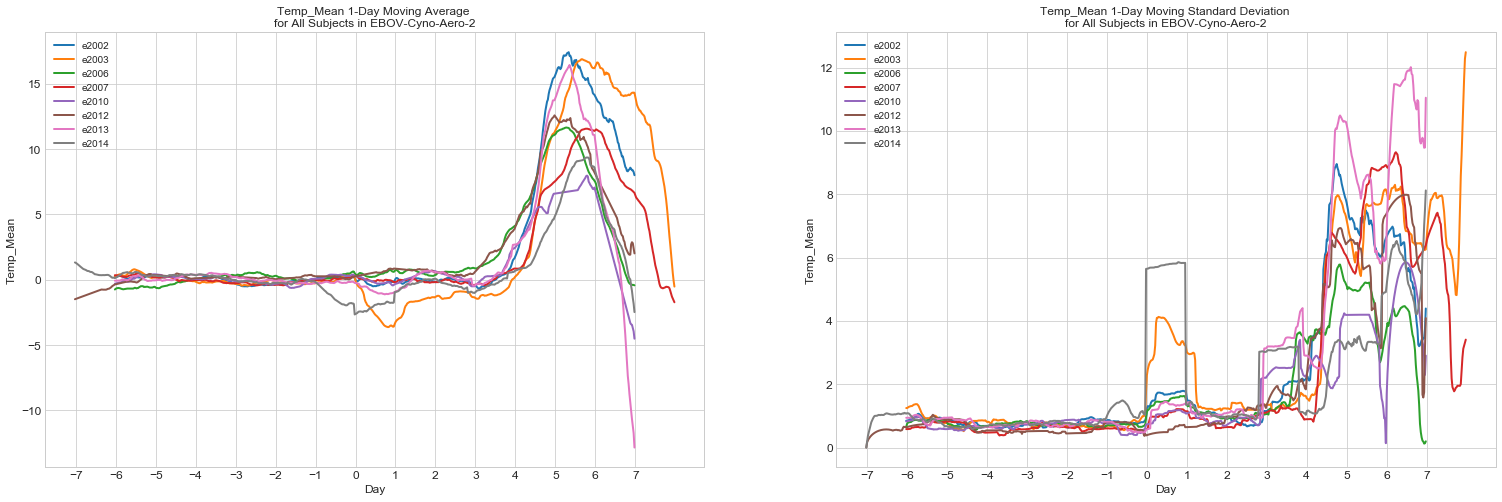

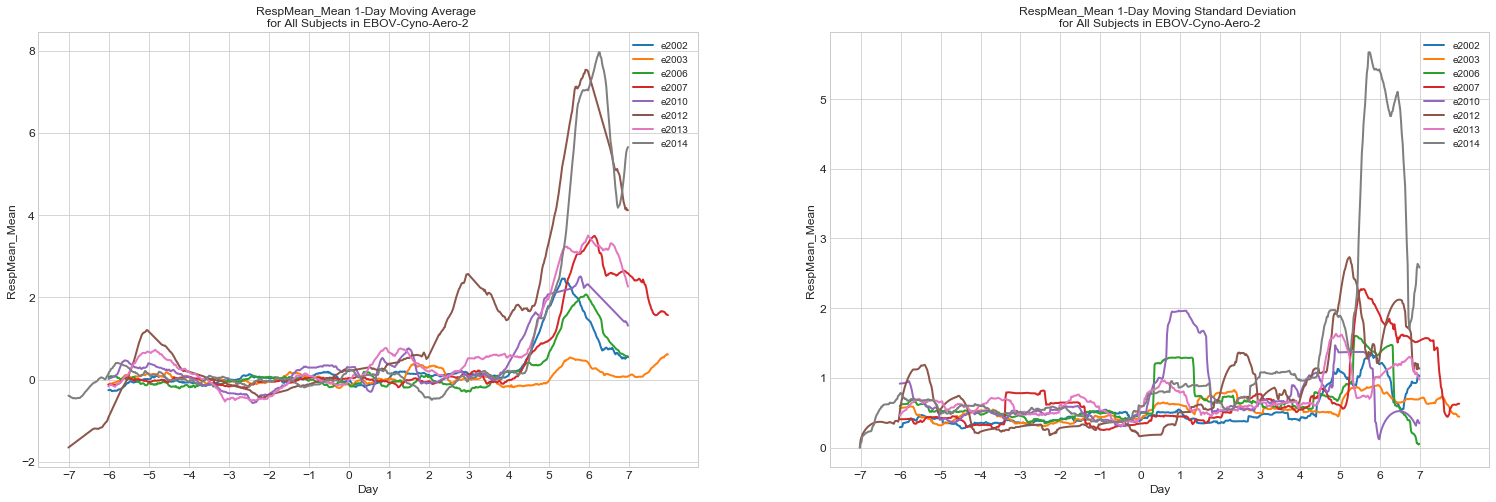

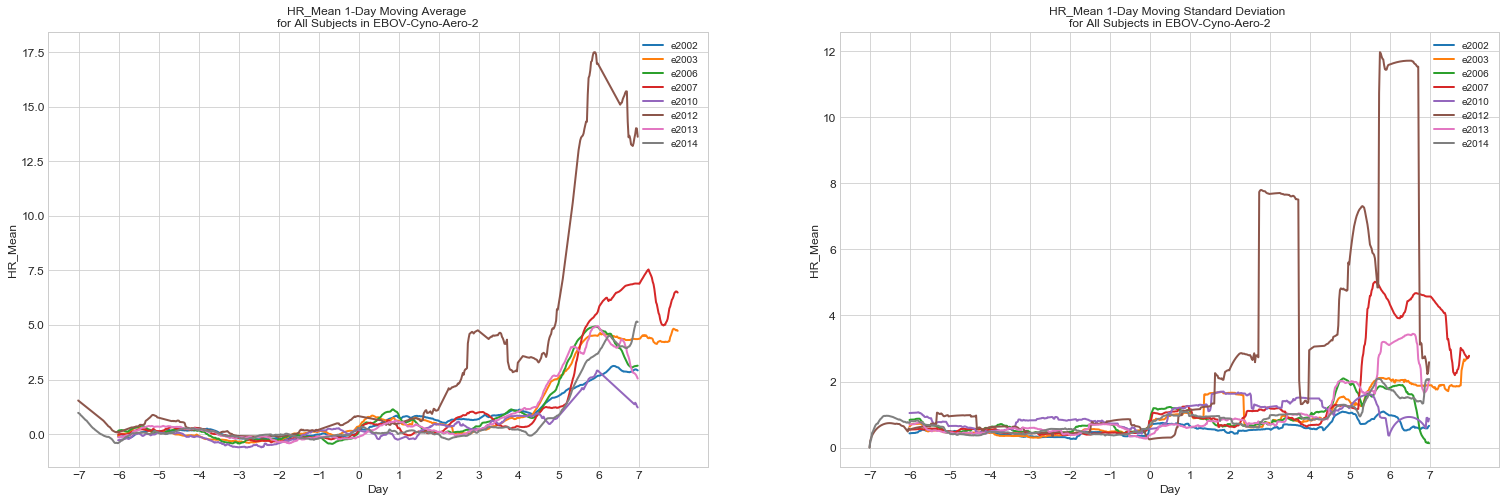

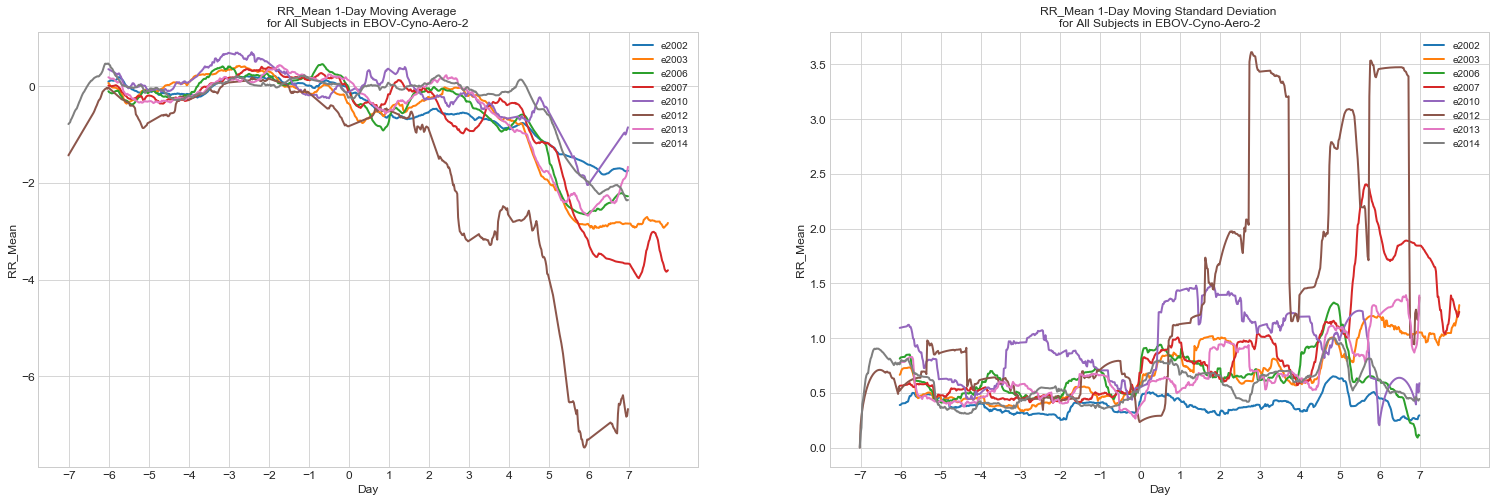

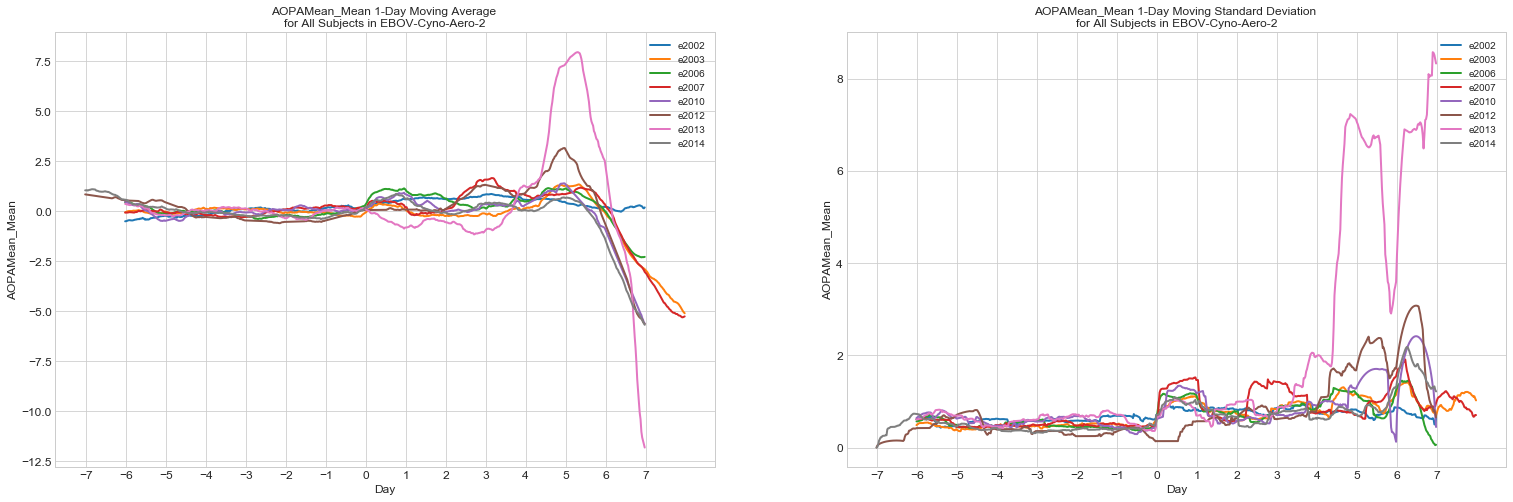

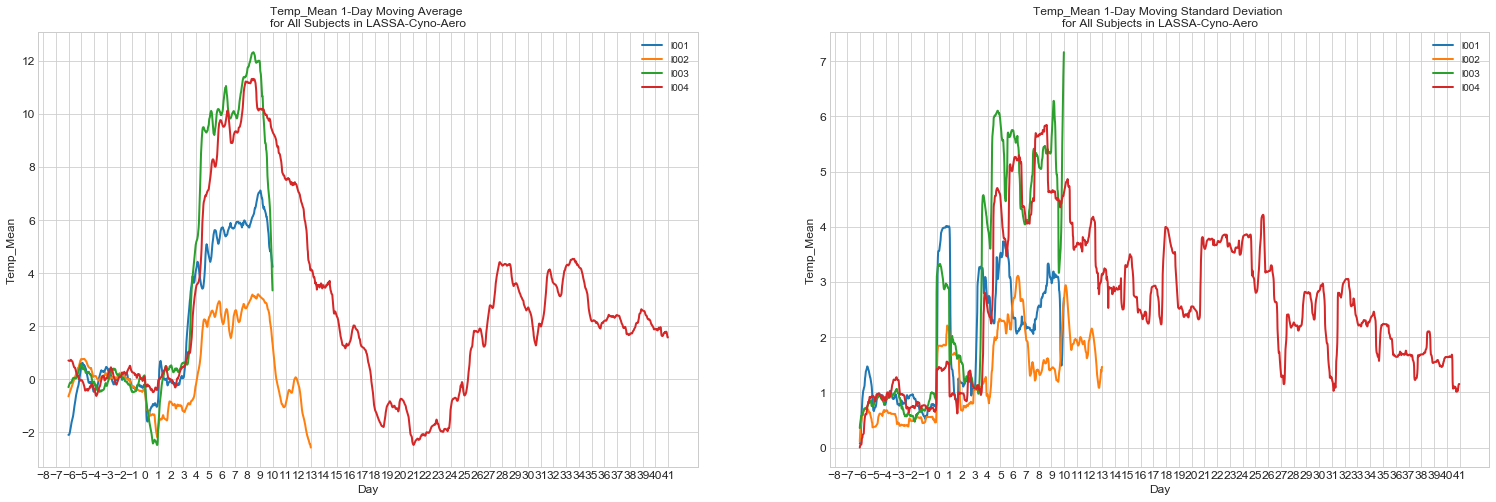

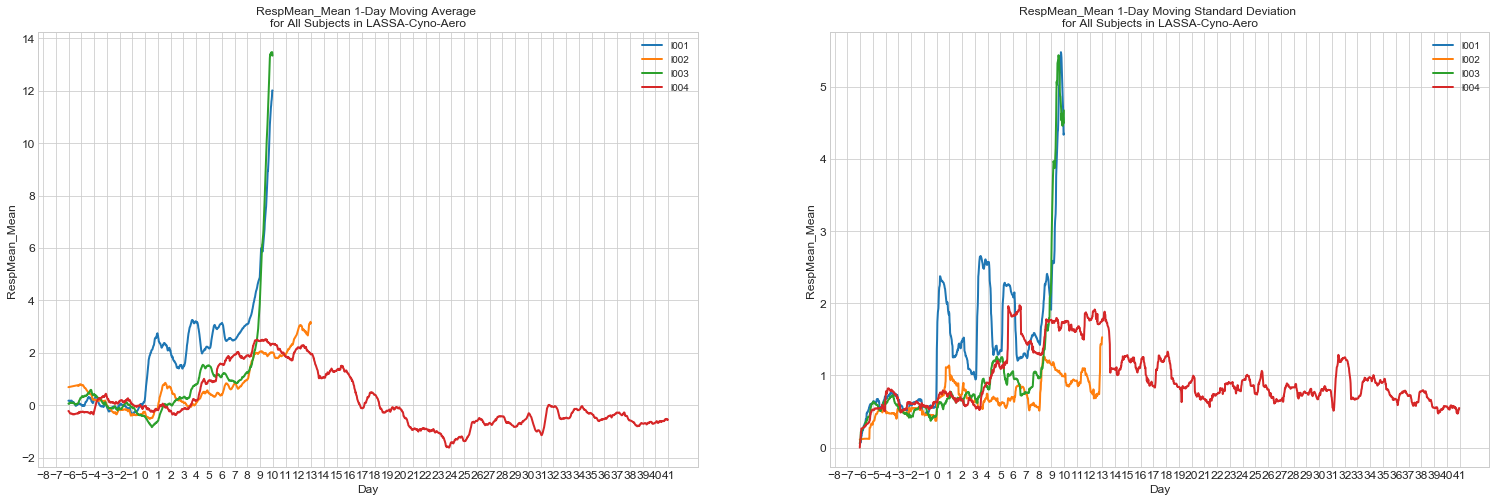

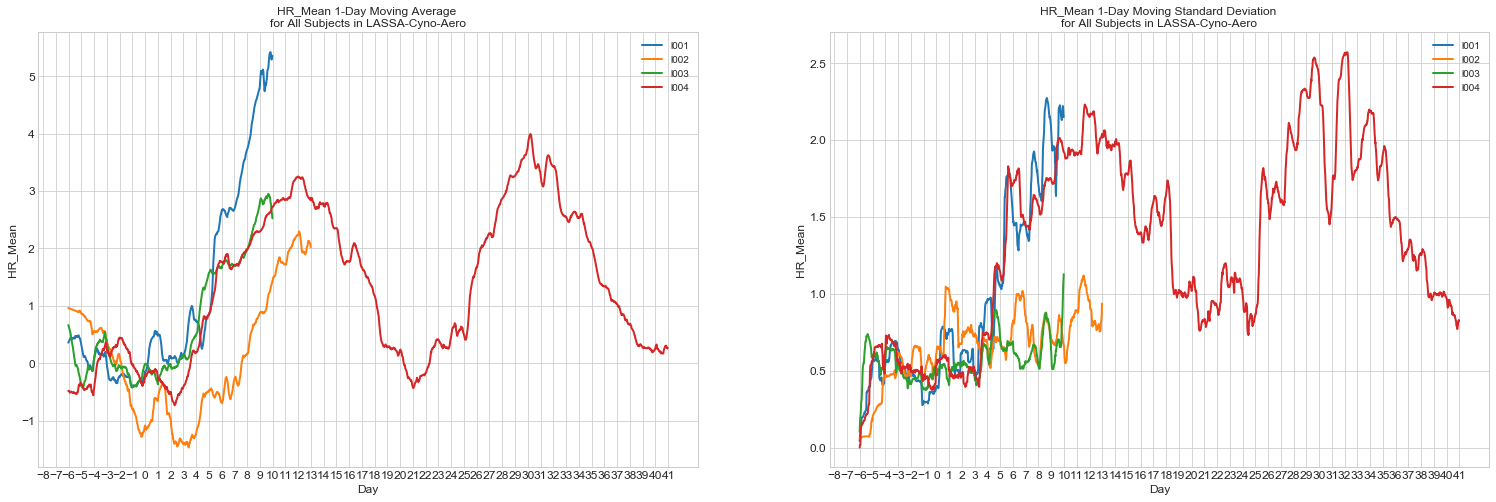

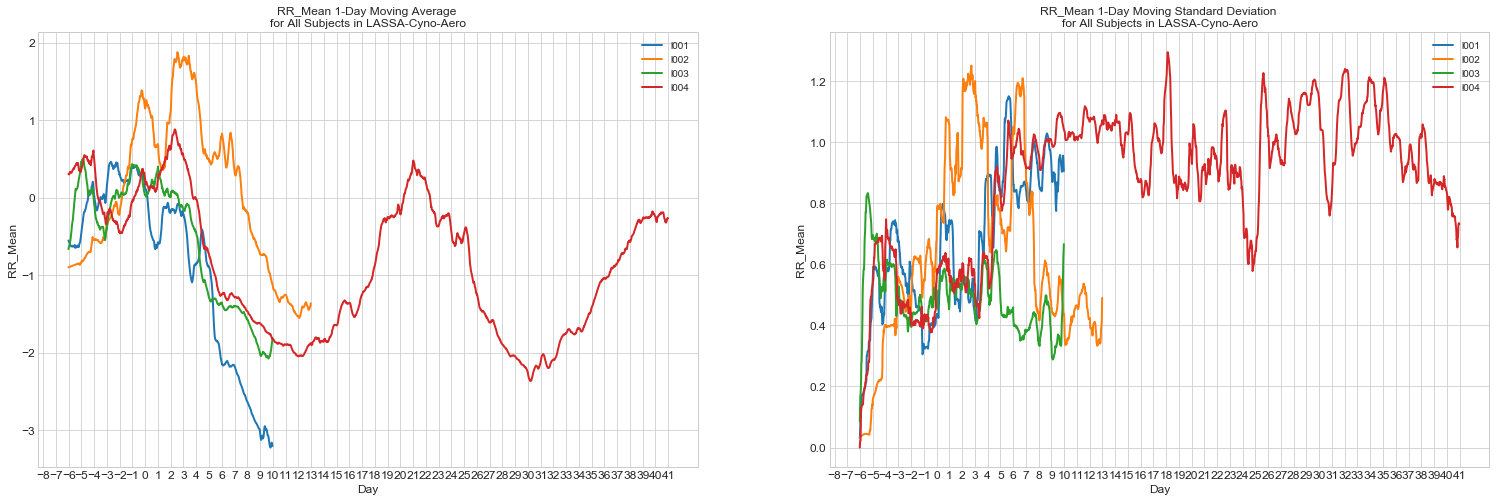

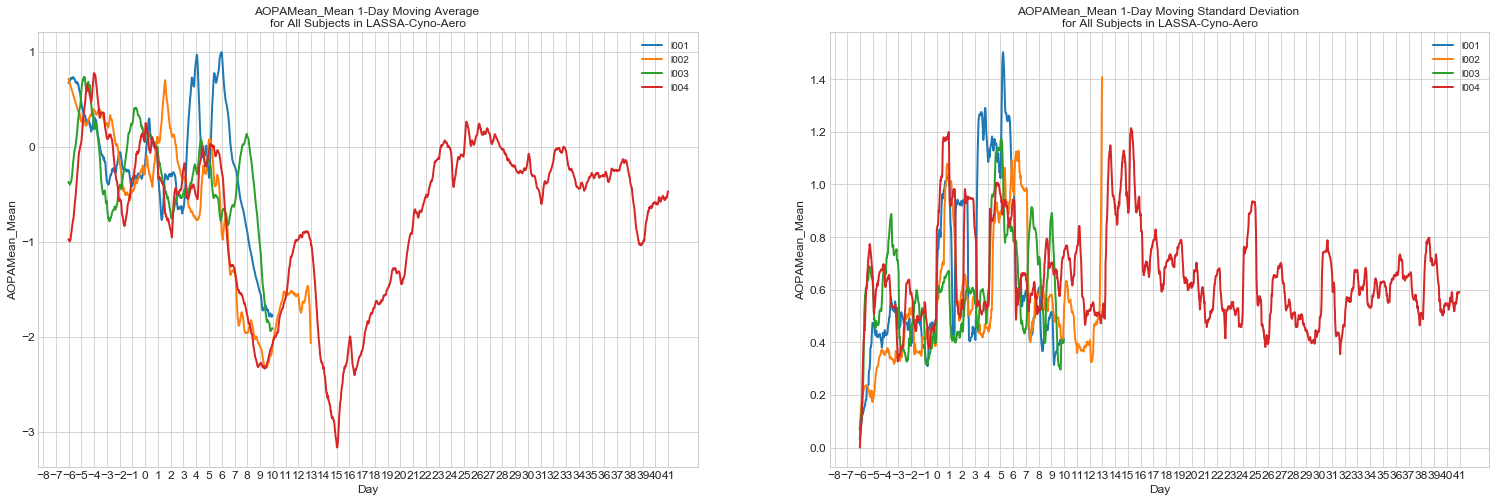

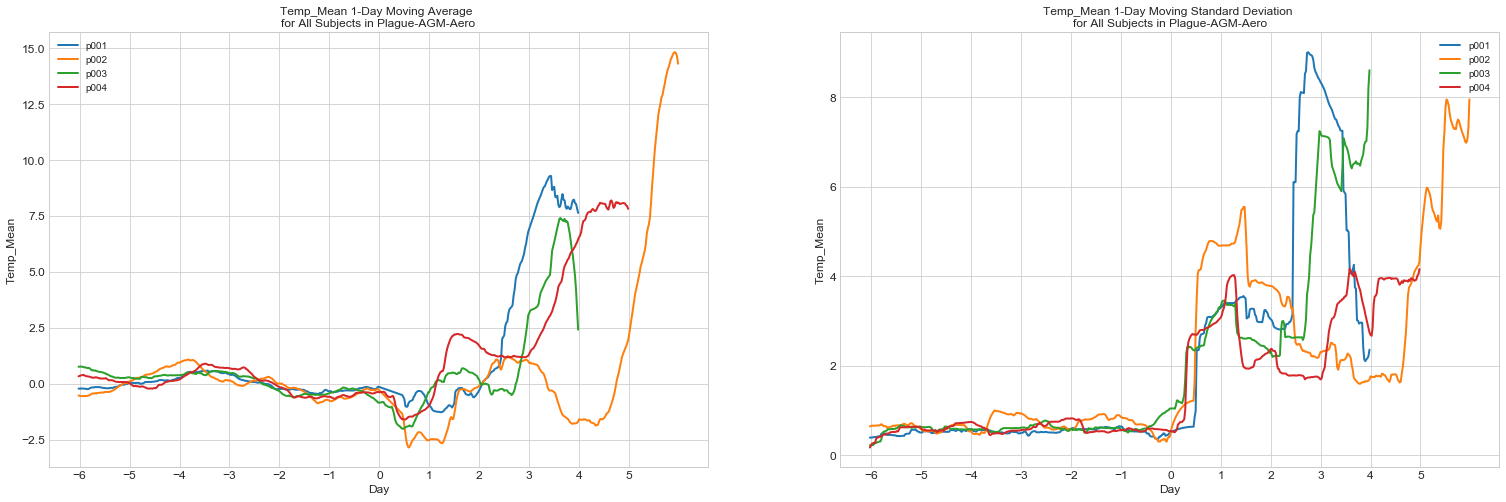

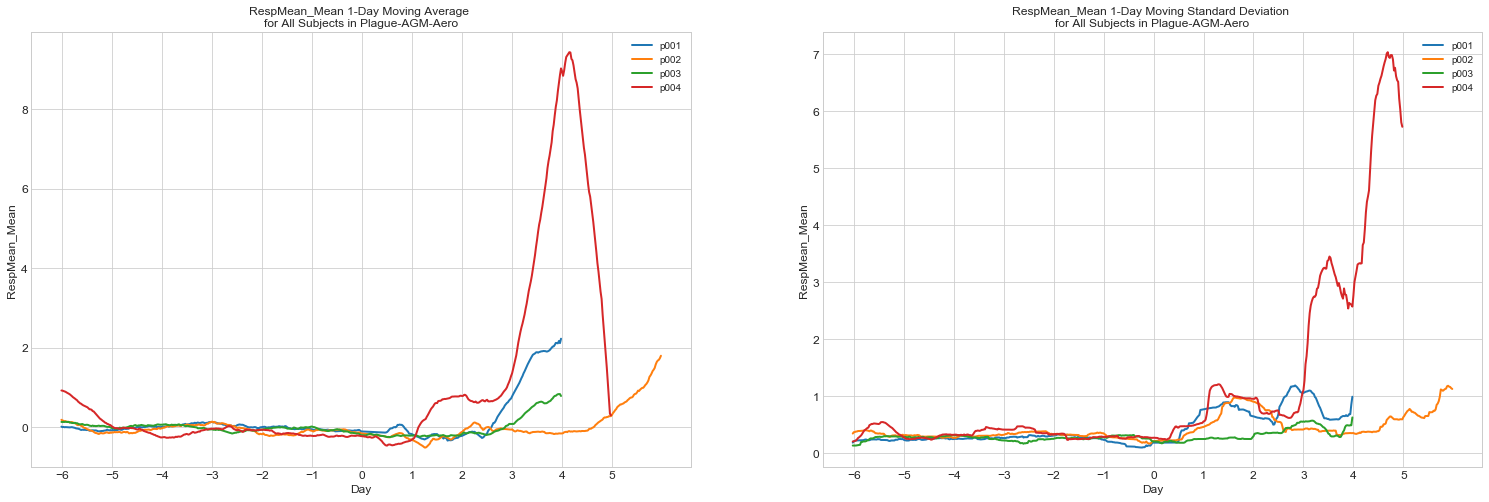

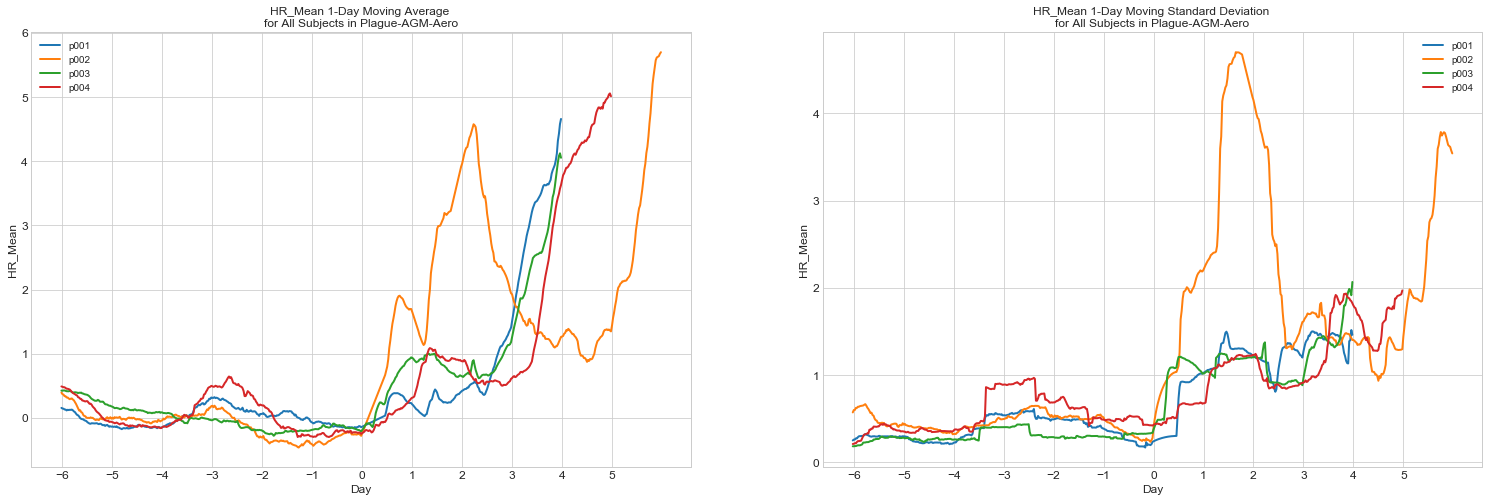

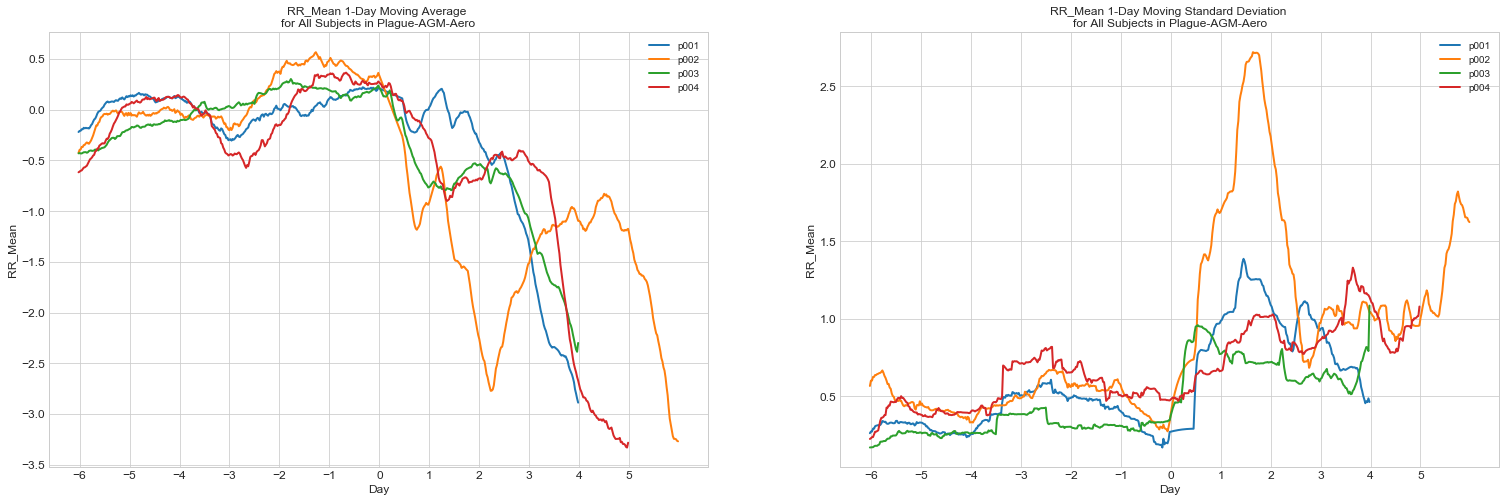

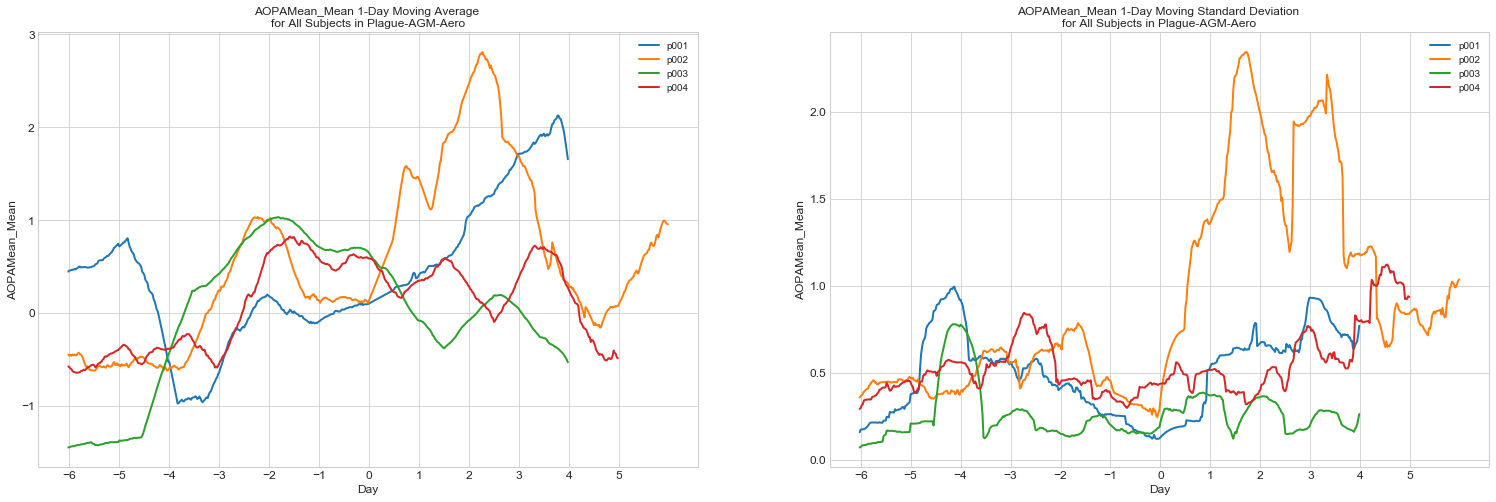

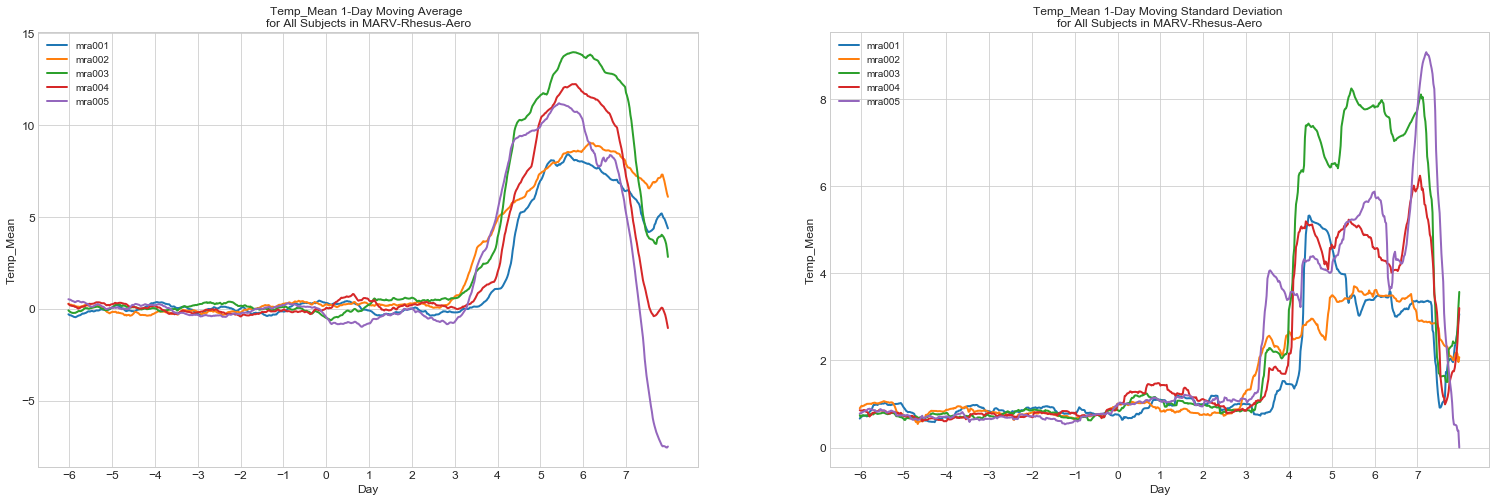

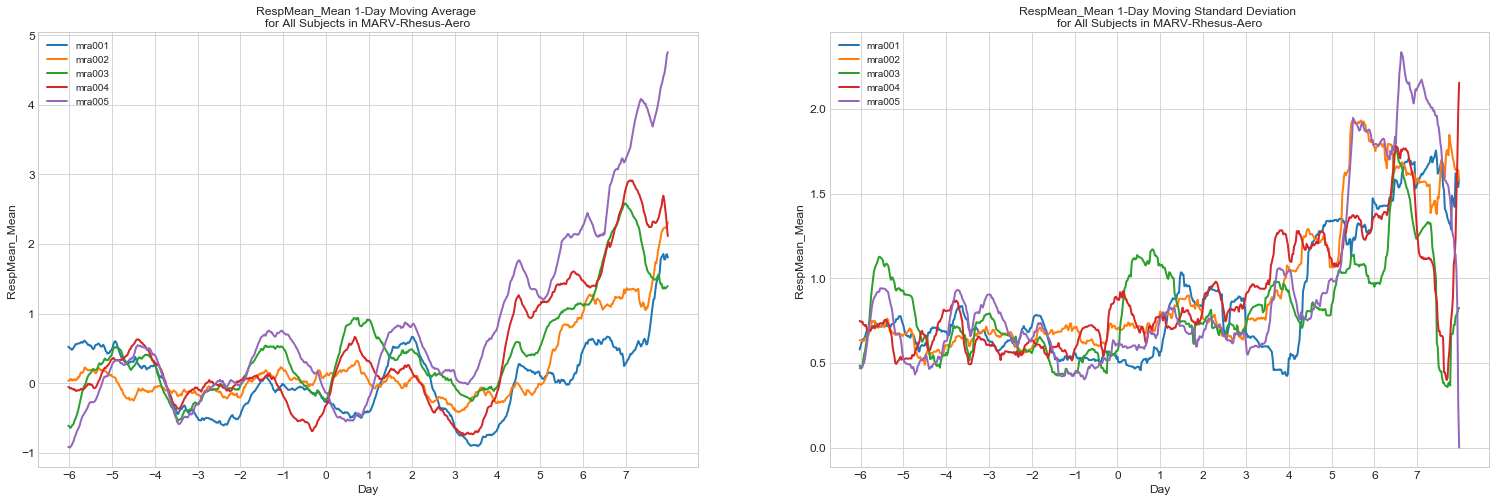

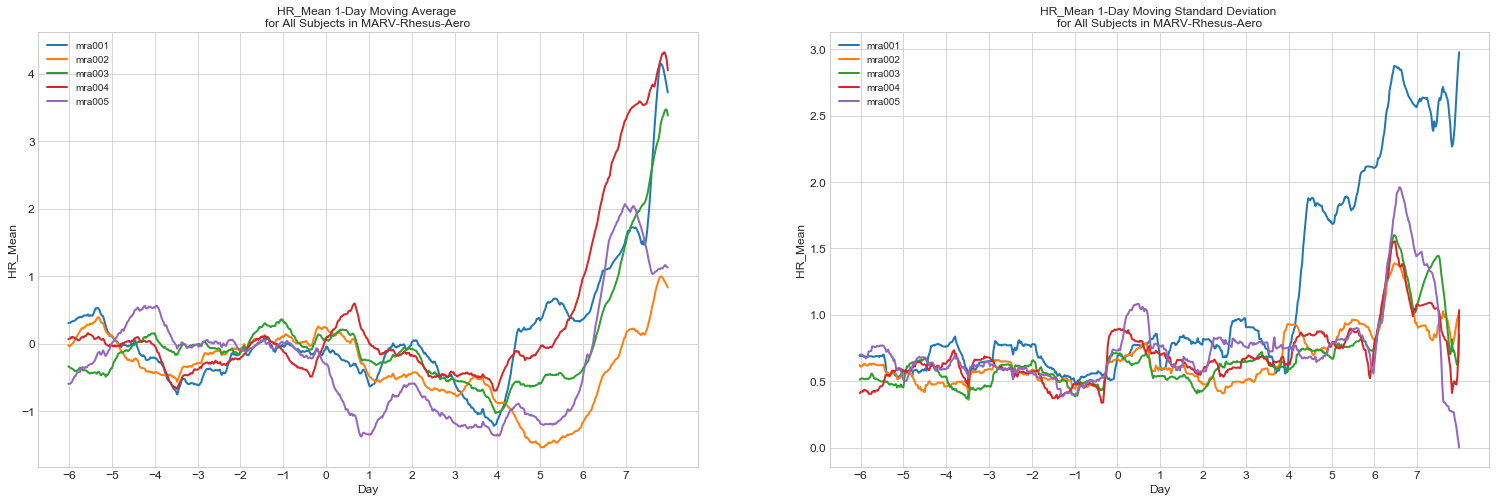

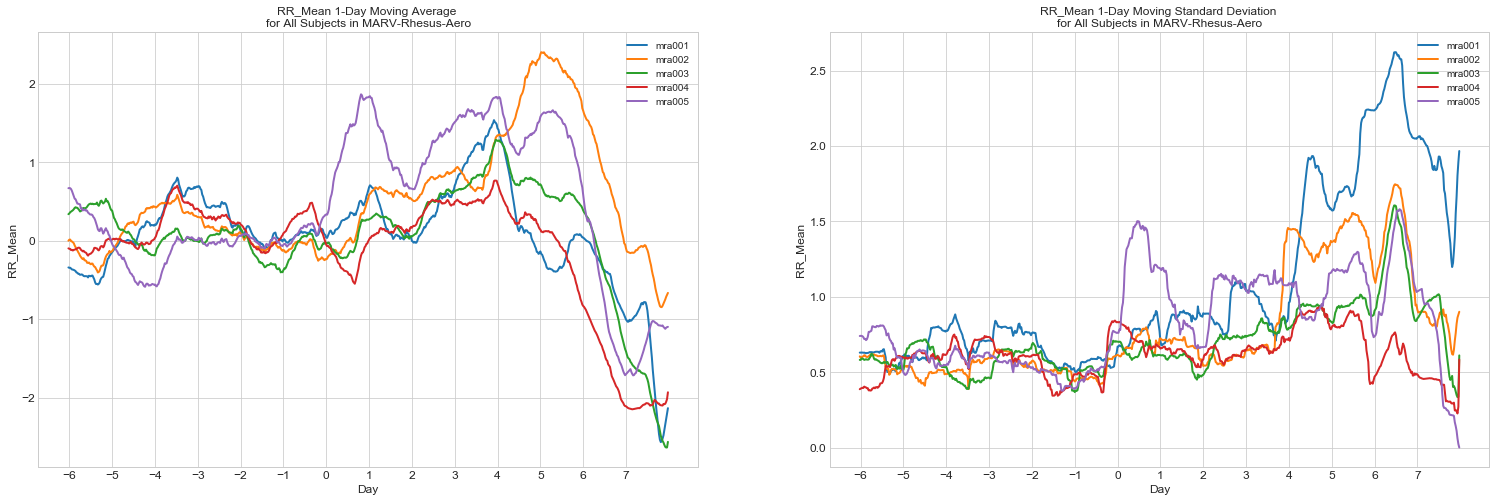

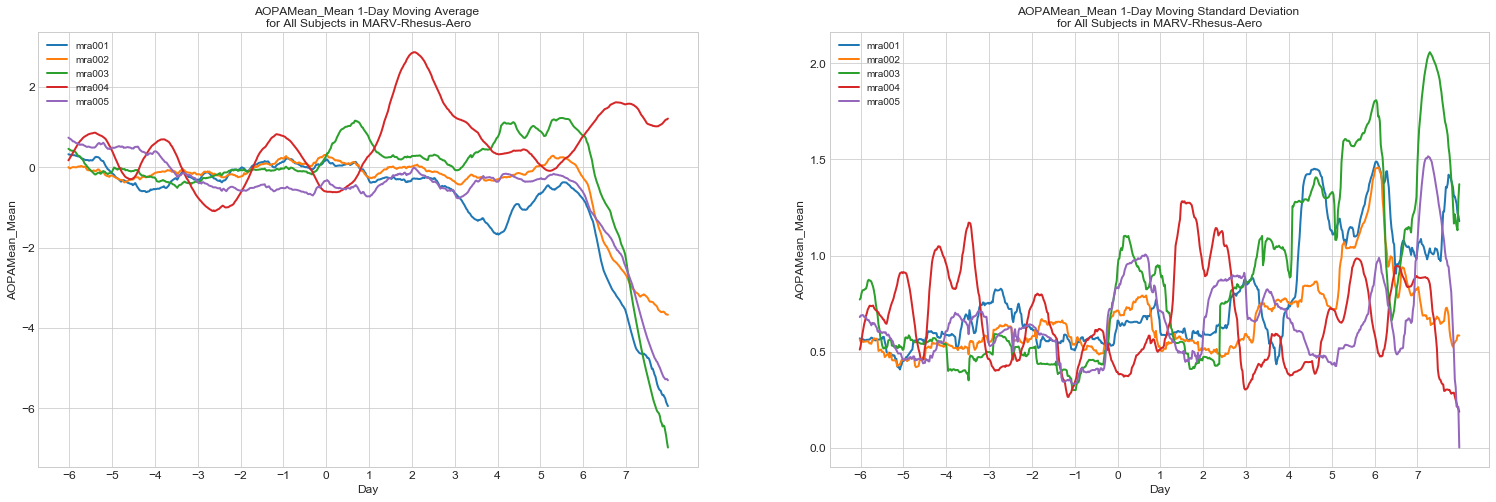

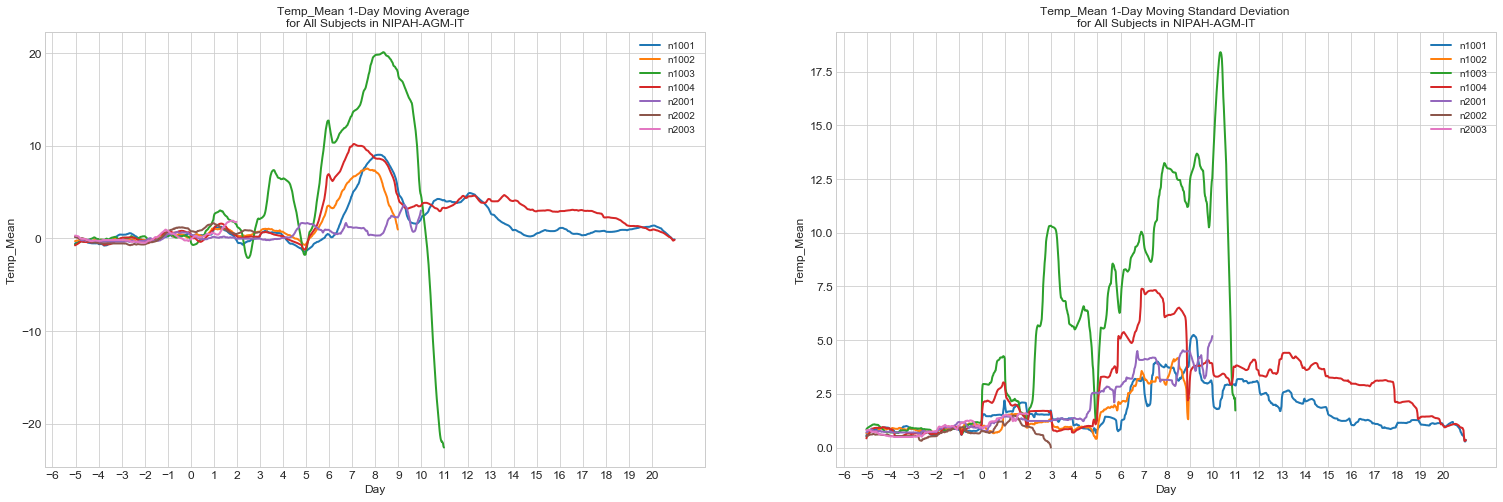

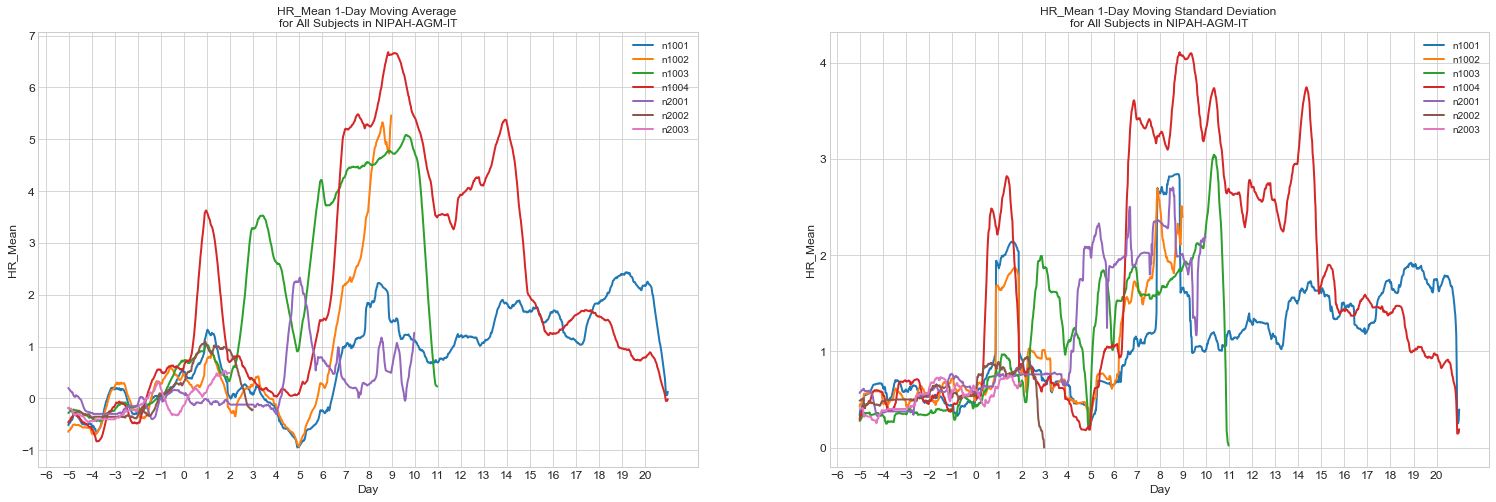

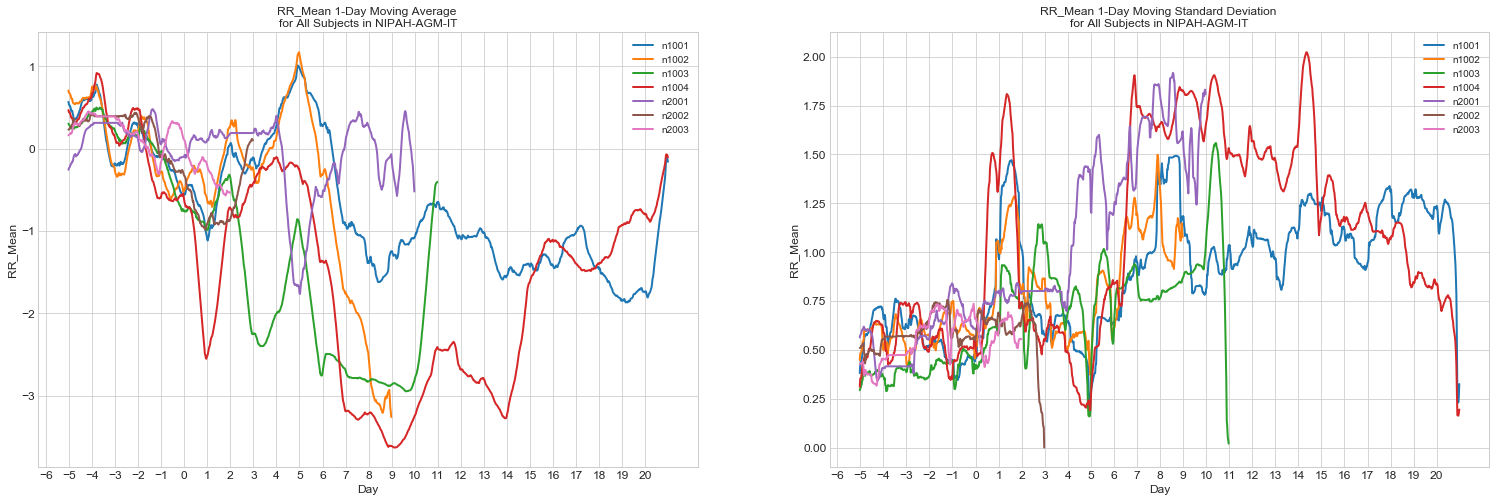

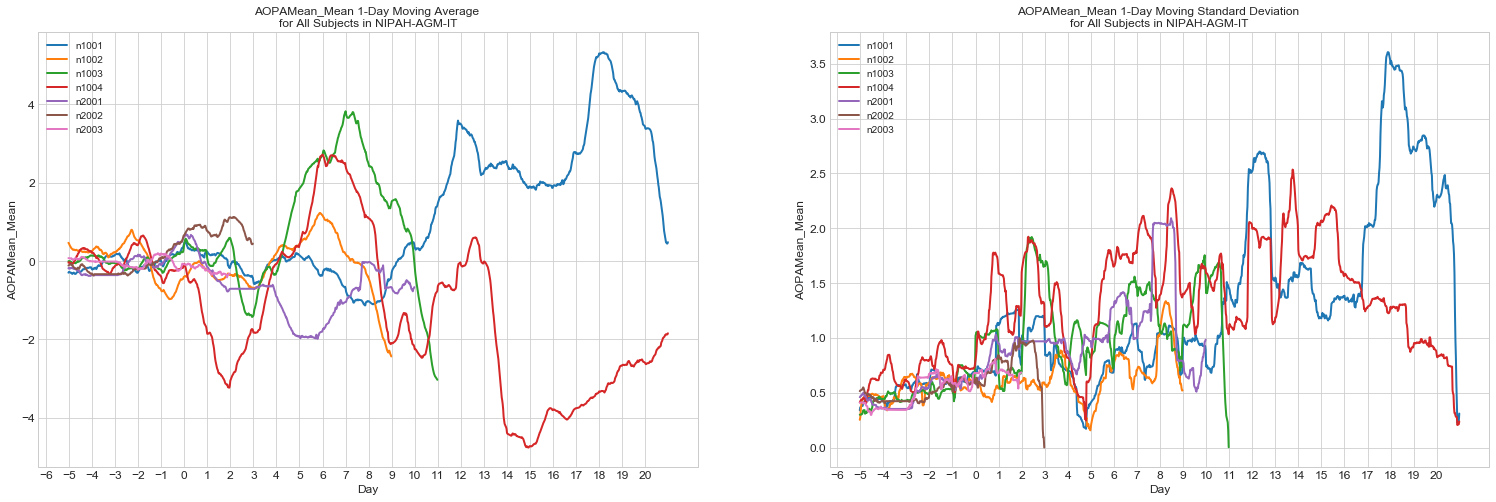

In [6]:
def find_csvs(path, suffix=".csv" ):
    """
    Get all the CSV files from a path.
    
    Keword arguments:
    path -- The path in which to look for CSV files
    suffix -- The file extension to look for in the path
    """
    filenames = os.listdir(path)
    return [
        filename for filename in filenames if filename.endswith(
            suffix)]

csvs = find_csvs('../transformed_csvs')
for csv in csvs:
    plot(os.path.join('../transformed_csvs', csv))